In [235]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [249]:
pension=pd.read_excel("./숙박유형_관광펜션업.xlsx")
camping=pd.read_excel("./숙박유형_일반야영장업.xlsx")
hanok=pd.read_excel("./숙박유형_한옥체험업.xlsx")
resort=pd.read_excel("./숙박유형_호텔리조트.xlsx") #숙소

dessert=pd.read_csv()

In [251]:
pension.drop(pension[(pension['영업상태구분코드']!=1)].index,inplace=True)
camping.drop(camping[(camping['영업상태구분코드']!=1)].index,inplace=True)
hanok.drop(hanok[(hanok['영업상태구분코드']!=1)].index,inplace=True)
resort.drop(resort[(resort['영업상태구분코드']!=1)].index,inplace=True)
#1: 영업/정상

In [253]:
pension[['도로명우편번호','시설규모']]=pension[['도로명우편번호','시설규모']].fillna(0)
camping[['도로명우편번호','시설규모']]=camping[['도로명우편번호','시설규모']].fillna(0)
hanok[['도로명우편번호','시설규모']]=hanok[['도로명우편번호','시설규모']].fillna(0)
resort[['도로명우편번호','시설규모']]=resort[['도로명우편번호','시설규모']].fillna(0)

In [239]:
pension['도로명우편번호'].astype(int)
camping['도로명우편번호'].astype(int)
hanok['도로명우편번호'].astype(int)
resort['도로명우편번호'].astype(int)

3290       3054
3291       3070
3292       3132
3293       3191
3294       3039
          ...  
299877    15575
299878    15632
299879    15582
299917    15385
299918    15517
Name: 도로명우편번호, Length: 104746, dtype: int32

In [240]:
pension_fr=pension.loc[(pension['도로명우편번호']>56999)&(pension['도로명우편번호']<60000)]
camping_fr=camping.loc[(camping['도로명우편번호']>56999)&(camping['도로명우편번호']<60000)]
hanok_fr=hanok.loc[(hanok['도로명우편번호']>56999)&(hanok['도로명우편번호']<60000)]
resort_fr=resort.loc[(resort['도로명우편번호']>56999)&(resort['도로명우편번호']<60000)]
dessert_fr=dessert.loc[(dessert['도로명우편번호']>56999)&(dessert['도로명우편번호']<60000)]

In [241]:
print(pension_fr.info())
print(camping_fr.info())
print(hanok_fr.info())
print(resort_fr.info())

<class 'pandas.core.frame.DataFrame'>
Index: 92 entries, 548 to 657
Data columns (total 63 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   번호          92 non-null     int64  
 1   개방서비스명      92 non-null     object 
 2   개방서비스아이디    92 non-null     object 
 3   개방자치단체코드    92 non-null     int64  
 4   관리번호        92 non-null     object 
 5   인허가일자       92 non-null     object 
 6   인허가취소일자     0 non-null      object 
 7   영업상태구분코드    92 non-null     int64  
 8   영업상태명       92 non-null     object 
 9   상세영업상태코드    92 non-null     int64  
 10  상세영업상태명     92 non-null     object 
 11  폐업일자        0 non-null      object 
 12  휴업시작일자      0 non-null      object 
 13  휴업종료일자      0 non-null      object 
 14  재개업일자       0 non-null      float64
 15  소재지전화       29 non-null     object 
 16  소재지면적       0 non-null      float64
 17  소재지우편번호     17 non-null     object 
 18  소재지전체주소     92 non-null     object 
 19  도로명전체주소     92 non-null     objec

In [242]:
ps=pension_fr.loc[:,['좌표정보(X)','좌표정보(Y)','시설규모']]
cp=camping_fr.loc[:,['좌표정보(X)','좌표정보(Y)','시설규모']]
hk=hanok_fr.loc[:,['좌표정보(X)','좌표정보(Y)','시설규모']]
rs=resort_fr.loc[:,['좌표정보(X)','좌표정보(Y)','시설규모']]
ds=dessert_fr.loc[:,['좌표정보(X)','좌표정보(Y)','시설총규모']]

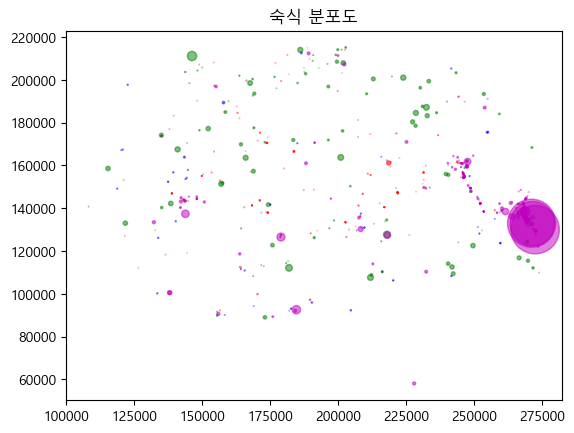

In [246]:
fig, ax = plt.subplots()

ax.scatter(x=ps['좌표정보(X)'],y=ps['좌표정보(Y)'],s=ps['시설규모']/1000,alpha=0.5,c='b',label='펜션')
ax.scatter(x=cp['좌표정보(X)'],y=cp['좌표정보(Y)'],s=cp['시설규모']/1000,alpha=0.5,c='g',label='일반야영장')
ax.scatter(x=hk['좌표정보(X)'],y=hk['좌표정보(Y)'],s=hk['시설규모']/1000,alpha=0.5,c='r',label='한옥체험')
ax.scatter(x=rs['좌표정보(X)'],y=rs['좌표정보(Y)'],s=rs['시설규모']/1000,alpha=0.5,c='m',label='호텔리조트')
ax.scatter(x=ds['좌표정보(X)'],y=ds['좌표정보(Y)'],s=ds['시설총규모']*1000,alpha=1,c='y',label='음식점')

plt.title('숙식 분포도')

plt.show()

In [247]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   좌표정보(X)  0 non-null      float64
 1   좌표정보(Y)  0 non-null      float64
 2   시설총규모    0 non-null      float64
dtypes: float64(3)
memory usage: 0.0 bytes


In [248]:
dessert['도로명우편번호']

3290       3054.0
3291       3070.0
3292       3132.0
3293       3191.0
3294       3039.0
           ...   
299877    15575.0
299878    15632.0
299879    15582.0
299917    15385.0
299918    15517.0
Name: 도로명우편번호, Length: 104746, dtype: float64